# Jupyter demo notebook


Variables used by other parts of this autogenerated notebook - Don't modify if you don't know what you are doing!)

Description : fileName variable, indicates the name of the document to save

In [1]:
fileName='jupyter-demo-notebook.ipynb'

Description : resultDatasetParents variable, indicates the permIds of the parents of the result dataset

In [2]:
resultDatasetParents=["20190328142001003-505"]

Description : history identifier, different versions of the same notebook should share the same identifier to keep the history

In [3]:
resultDatasetHistoryId='a9ffa30e-b79f-8153-8e19-e250e2cd0253'

Description : resultDatasetName variable, indicates the name of the result dataset, **to be set by the user**

In [4]:
resultDatasetName='Analysis dataset'

Description : resultDatasetNotes variable, indicate some notes of the result dataset, **to be set by the user**

In [5]:
resultDatasetNotes='My first Jupyter analysis!'

## Import required modules

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.morphology import reconstruction, remove_small_objects
from skimage.measure import label, regionprops

%matplotlib inline

## Connect to openBIS

In [7]:
from pybis import Openbis
o = Openbis()

Session is no longer valid. Please log in again.


In [ ]:
import getpass
password = getpass.getpass()
o.login("user", password)

## Datasets Information

Dataset 20190328133056219-504 Owner:

In [9]:
s0 = o.get_object('20190328133015176-503')
s0

attribute,value
code,JUPYTER-DEMO
permId,20190328133015176-503
identifier,/SIS_HLUETCKE/DEMO/JUPYTER-DEMO
type,EXPERIMENTAL_STEP
project,/SIS_HLUETCKE/DEMO
parents,[]
children,[]
components,[]
space,SIS_HLUETCKE
experiment,/SIS_HLUETCKE/DEMO/JUPYTER-DEMO


Dataset 20190328133056219-504:

In [10]:
ds0 = o.get_dataset('20190328133056219-504')
ds0.attrs

attribute,value
code,20190328133056219-504
permId,20190328133056219-504
type,RAW_DATA
experiment,/SIS_HLUETCKE/DEMO/JUPYTER-DEMO
sample,/SIS_HLUETCKE/DEMO/JUPYTER-DEMO
parents,[]
children,[]
components,
tags,[]
accessDate,2019-03-28 13:38:40


In [11]:
ds0.get_files(start_folder="/")

,isDirectory,pathInDataSet,fileSize,crc32Checksum
0,True,original,-1,0
1,False,original/blobs.tif,65172,a988a199


## Datasets Download

In [12]:
ds0.download(files=ds0.file_list, destination='./', wait_until_finished=True)

Files downloaded to: ./20190328133056219-504


'./'

## Process your data here

In [16]:
img = imread('./20190328133056219-504/original/blobs.tif')

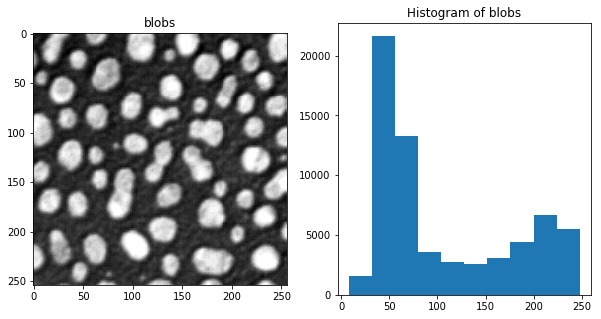

In [17]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(121)
plt.imshow(img, cmap='gray')
plt.title('blobs')

fig.add_subplot(122)
plt.hist(img.ravel(), bins=10)
plt.title('Histogram of blobs')

plt.show()

In [18]:
intensity_threshold = 150
binary = img > intensity_threshold

Text(0.5,1,'binary')

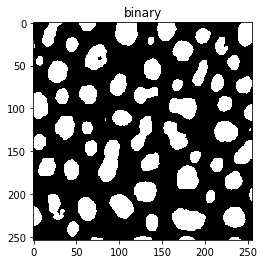

In [19]:
plt.imshow(binary, cmap='gray')
plt.title('binary')

In [20]:
seed = np.copy(binary)
seed[1:-1, 1:-1] = binary.max()

filled = reconstruction(seed, binary, method='erosion')

Text(0.5,1,'filled')

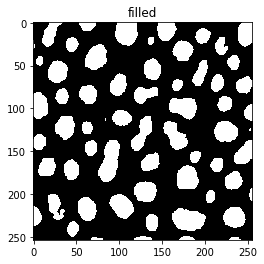

In [21]:
plt.imshow(filled, cmap='gray')
plt.title('filled')

In [22]:
filled2 = remove_small_objects(filled.astype(bool), min_size=20)

Text(0.5,1,'small objects removed')

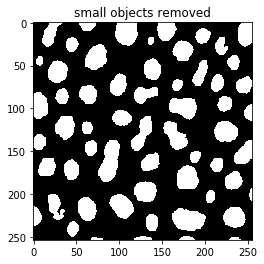

In [23]:
plt.imshow(filled2, cmap='gray')
plt.title('small objects removed')

In [24]:
label_img = label(filled2, connectivity=img.ndim)

Text(0.5,1,'labeled')

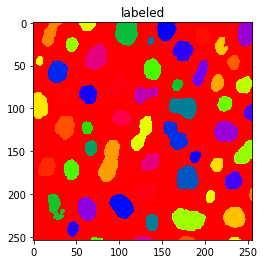

In [25]:
plt.imshow(label_img*10, cmap='prism')
plt.title('labeled')

In [26]:
props = regionprops(label_img)
area = np.array([x.area for x in props])

In [27]:
area

array([373, 162, 614, 404, 448, 252, 222, 196,  58, 444, 585, 197,  74,
       405, 473, 342, 375, 239, 312, 134, 364, 373, 219, 464, 246, 617,
       157, 328, 487, 535, 162, 565, 547, 234, 820, 442, 203, 139, 352,
       369, 205, 336, 583, 341, 523,  56, 139, 364, 560, 482, 181, 511,
       780, 241, 180,  78,  68,  42,  34])

## Saving the results

The next cell stores a copy of this notebook as an html file so it can be open easily in browsers without the need of Jupyter, **save before executing this to get the lattest version as html**

In [ ]:
from nbconvert import HTMLExporter
import codecs
import nbformat
exporter = HTMLExporter()
output_notebook = nbformat.read(fileName, as_version=4)
output, resources = exporter.from_notebook_node(output_notebook)
codecs.open(fileName + '.html', 'w', encoding='utf-8').write(output)


Sets the owner of the result dataset

In [ ]:
owner= o.get_object('/SIS_HLUETCKE/DEMO/JUPYTER-DEMO'),
owner

Creates the result dataset

In [ ]:
ds_new = o.new_dataset(
type='ANALYZED_DATA',
sample= o.get_object('/SIS_HLUETCKE/DEMO/JUPYTER-DEMO'),
parents=resultDatasetParents,
files = [fileName, fileName + '.html'],
props={'name': resultDatasetName, 'notes': resultDatasetNotes, 'history_id' : resultDatasetHistoryId })
ds_new.save()